# **Saudi Arabia Tourism Insights: An Exploratory Data Analysis**

**Introduction**

Tourism plays a vital role in Saudi Arabia’s economic diversification efforts, especially under Vision 2030, which emphasizes the development of cultural, religious, and domestic tourism. Understanding tourist behavior, spending patterns, and regional trends is essential for policymakers, businesses, and researchers seeking to enhance tourism experiences and allocate resources effectively.

This project utilizes the Saudi Arabia Tourism Dataset (2015–2024), which contains over 1,000 records covering inbound (foreign) and domestic tourism across all provinces. The dataset includes key variables such as the number of tourists, overnight stays, spending, and average spending per trip. Data was compiled from official statistics published by the Saudi Ministry of Tourism.

**The objective of this exploratory data analysis (EDA) is to:**

* Explore overall tourism trends over time.

* Compare inbound and domestic tourism behavior.

* Identify regional differences in spending and tourist numbers.

* Extract key insights that may guide decision-making and further analysis.

Through a combination of descriptive statistics and visualizations, this report highlights the main tourism patterns across Saudi provinces over the past decade.

# Imports and Reading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('tourism_data.csv')
df.head()

,YEARS,Tourists_Number,Overnight_Stay,Tourists_Spending,Avg_Stay,Avg_Spending_Trip,Avg_Spending_Night,Province,Tourism_Type
0,2015,6.0,59.0,43.0,10.0,7029.0,727.0,Albaha,Inbound
1,2015,6.0,59.0,43.0,10.0,7029.0,727.0,Albaha,Inbound
2,2015,0.0,0.0,0.0,0.0,0.0,0.0,Albaha,Inbound
3,2015,0.0,0.0,0.0,0.0,0.0,0.0,Albaha,Inbound
4,2015,1041.0,8807.0,1120.0,8.5,1075.0,127.0,Albaha,Domestic


# Dataset Overview

In [ ]:
df.shape

(1058, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEARS               1058 non-null   int64  
 1   Tourists_Number     1058 non-null   float64
 2   Overnight_Stay      1058 non-null   float64
 3   Tourists_Spending   1058 non-null   float64
 4   Avg_Stay            1058 non-null   float64
 5   Avg_Spending_Trip   1058 non-null   float64
 6   Avg_Spending_Night  1058 non-null   float64
 7   Province            1058 non-null   object 
 8   Tourism_Type        1058 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 74.5+ KB


The dataset contains 1058 rows and 9 columns. No missing values were detected. Variables include both numerical measures and categorical attributes (province, tourism type).

In [ ]:
df.describe().round(2)

,YEARS,Tourists_Number,Overnight_Stay,Tourists_Spending,Avg_Stay,Avg_Spending_Trip,Avg_Spending_Night
count,1058.00,1058.00,1058.00,1058.00,1058.00,1058.00,1058.00
mean,2019.52,1470.10,10752.58,3415.74,8.68,2441.30,351.43
std,2.88,3107.37,32095.82,12359.89,9.18,2343.43,288.28
min,2015.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2017.00,29.00,186.50,63.00,4.30,1075.25,170.00
50%,2020.00,269.50,1662.00,382.50,6.10,1595.50,241.50
75%,2022.00,1265.05,8896.25,1871.75,8.70,3062.75,441.00
max,2024.00,23487.00,430796.00,140770.00,71.00,39009.00,1987.00


The dataset shows strong variability and skewness in tourist behavior. While the majority of trips are low in numbers and spending, some provinces and years record exceptionally high tourist volumes (up to 23,000+) and overnight stays (up to 430,000+), suggesting outliers. Spending patterns are also skewed, with most trips costing less than 2,000 SAR but some exceeding 39,000 SAR

# Data Cleaning & Preparation

In [ ]:
df.duplicated().sum()

np.int64(28)

In [ ]:
df = df.drop_duplicates()
df.head()

,YEARS,Tourists_Number,Overnight_Stay,Tourists_Spending,Avg_Stay,Avg_Spending_Trip,Avg_Spending_Night,Province,Tourism_Type
0,2015,6.0,59.0,43.0,10.0,7029.0,727.0,Albaha,Inbound
2,2015,0.0,0.0,0.0,0.0,0.0,0.0,Albaha,Inbound
4,2015,1041.0,8807.0,1120.0,8.5,1075.0,127.0,Albaha,Domestic
5,2015,947.0,7909.0,1016.0,8.4,1073.0,128.0,Albaha,Domestic
6,2015,33.0,269.0,39.0,8.3,1210.0,146.0,Albaha,Domestic


28 duplicate rows were found and removed to ensure data integrity

# Descriptive Analysis (Province, Year, Type)

In [ ]:
province_summary = df.groupby("Province").agg({
    "Tourists_Number": ["mean","sum"],
    "Tourists_Spending": ["mean","sum"],
    "Avg_Spending_Trip": "mean"
}).reset_index()

province_summary

Province Tourists_Number           Tourists_Spending             \
                                mean       sum              mean        sum   
0             Albaha      379.173016   23887.9        411.515873    25925.5   
1           Alqassim      509.447000   50944.7        639.590000    63959.0   
2              Aseer     1444.751282  112690.6       1940.384615   151350.0   
3     Eastern_region     2134.125000  213412.5       3458.900000   345890.0   
4               Hail      578.759091   25465.4        900.340909    39615.0   
5              Jazan      853.862069   49524.0        984.172414    57082.0   
6               Jouf      200.466250   16037.3        330.762500    26461.0   
7            Madinah     1364.396000  136439.6       1387.460000   138746.0   
8             Makkah     5225.499153  616608.9      17784.847458  2098612.0   
9             Najran      314.067241   18215.9        517.224138    29999.0   
10  Northern_borders      334.578333   20074.7        541.716667    32503.0   
11            Riyadh     3818.875000  229132.5       8884.950000   533097.0   
12             Tabuk      376.019820   41738.2        586.270270    65076.0   

   Avg_Spending_Trip  
                mean  
0        1530.761905  
1        2072.140000  
2        3063.384615  
3        1743.260000  
4        1729.113636  
5        3126.241379  
6        2515.075000  
7        2943.870000  
8        3127.949153  
9        2307.275862  
10       1567.700000  
11       2896.116667  
12       2334.567568

Makkah has by far the highest tourists and spending, while Riyadh and Eastern Region follow. Smaller provinces like Jouf and Najran attract fewer tourists but have high spend per trip, showing niche premium markets.


In [ ]:
yearly_summary = df.groupby("YEARS").agg({
    "Tourists_Number":"sum",
    "Tourists_Spending":"sum",

}).reset_index()
yearly_summary

,YEARS,Tourists_Number,Tourists_Spending
0,2015,128885.3,261791.0
1,2016,126858.9,304614.4
2,2017,120464.8,288523.0
3,2018,117602.1,283106.0
4,2019,131131.4,330825.0
5,2020,92671.3,129513.1
6,2021,136963.3,235287.0
7,2022,208974.1,413769.0
8,2023,237886.0,649735.0
9,2024,252735.0,711152.0


Tourist numbers were stable until 2019, dropped sharply in 2020 due to COVID, and then recovered strongly after 2022, reaching record highs in 2024 with spending surpassing pre-pandemic levels.


In [ ]:
type_summary = df.groupby("Tourism_Type").agg({
    "Tourists_Number": "sum",
    "Tourists_Spending": "sum"

}).reset_index()
type_summary

,Tourism_Type,Tourists_Number,Tourists_Spending
0,Domestic,1156450.5,1483495.0
1,Inbound,397721.7,2124820.5


Domestic trips dominate in volume, but inbound tourists contribute most of the spending, meaning inbound visitors are higher-value despite being fewer in number.


# Univariate Analysis

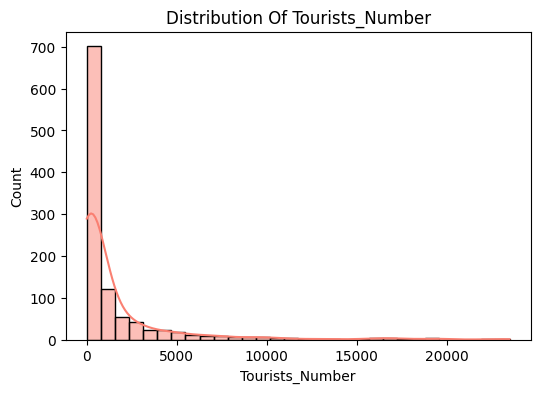

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Tourists_Number"], bins=30, kde=True, color="salmon")
plt.xlabel("Tourists_Number")
plt.ylabel("Count")
plt.title("Distribution Of Tourists_Number")
plt.show()


Insight:
Most provinces have fewer than 2000 tourists, while a few provinces record very high numbers, showing a strong right-skewed distribution with clear outliers.

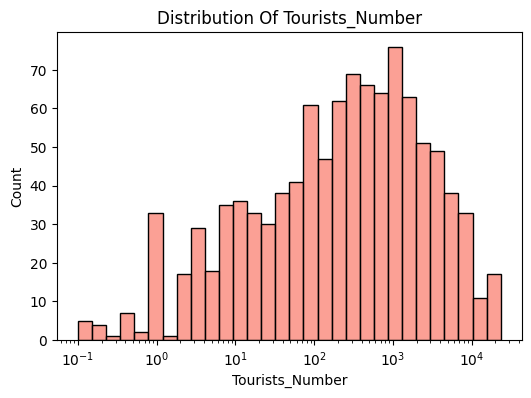

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Tourists_Number"], bins=30, color="salmon",log_scale=True)
plt.xlabel("Tourists_Number")
plt.ylabel("Count")
plt.title("Distribution Of Tourists_Number")
plt.show()


Insight: After log scaling, we see most provinces fall between 100–10,000 tourists, giving a clearer picture of the spread.

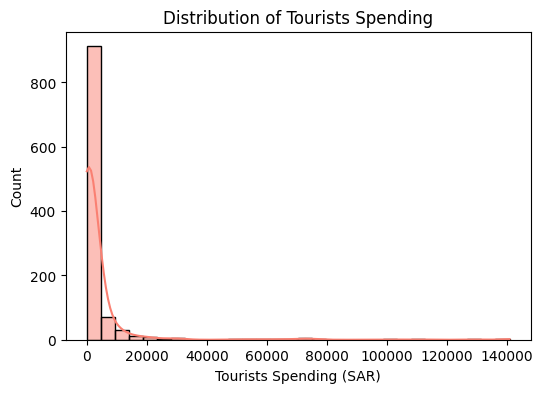

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Tourists_Spending"], bins=30, kde=True, color="salmon")
plt.xlabel("Tourists Spending (SAR)")
plt.ylabel("Count")
plt.title("Distribution of Tourists Spending")
plt.show()

Most tourists spend relatively little per trip (below 5,000 SAR), while a small number of outliers drive spending up to 140,000 SAR. The spending distribution is right-skewed

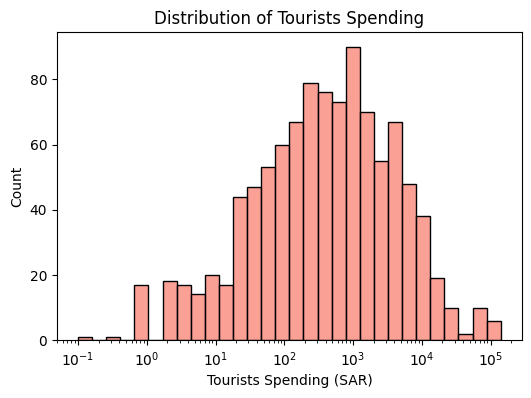

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Tourists_Spending"], bins=30, color="salmon",log_scale=True)
plt.xlabel("Tourists Spending (SAR)")
plt.ylabel("Count")
plt.title("Distribution of Tourists Spending")
plt.show()

Insight: after log scaling, we see Tourist spending is concentrated around 1,000 SAR, with a few very high outliers driving the long tail.

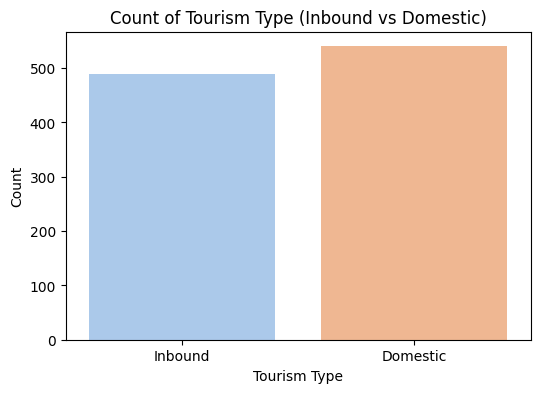

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Tourism_Type", data=df, palette="pastel",hue="Tourism_Type")
plt.xlabel("Tourism Type")
plt.ylabel("Count")
plt.title("Count of Tourism Type (Inbound vs Domestic)")
plt.show()

Insight: The dataset shows a nearly balanced distribution between inbound and domestic tourism, with domestic trips making up about 52% and inbound trips 48%. This highlights that while international arrivals are significant, domestic tourism holds a slightly larger share.

# Bivariate Analysis

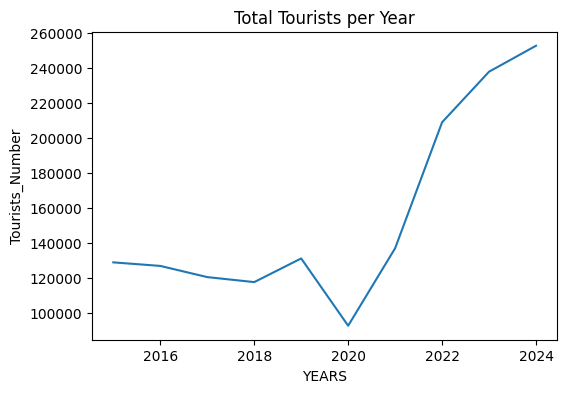

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x="YEARS", y="Tourists_Number", data=df, estimator='sum',errorbar=None)
plt.title("Total Tourists per Year")
plt.show()

Key Insights :

2015–2019: Gradual decline in tourist numbers, slight recovery in 2019.

2020: Sharp drop, likely due to global travel restrictions (COVID-19).

2021–2024: Strong and consistent growth, reaching record-high levels in 2024.

Implications:

The tourism sector is recovering strongly post-pandemic.

Potential to capitalize on this momentum with more marketing campaigns and events.

Forecast suggests further growth is possible if this trend continues.

/tmp/ipython-input-1619770837.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spending_province.index, y=avg_spending_province.values, palette="viridis")


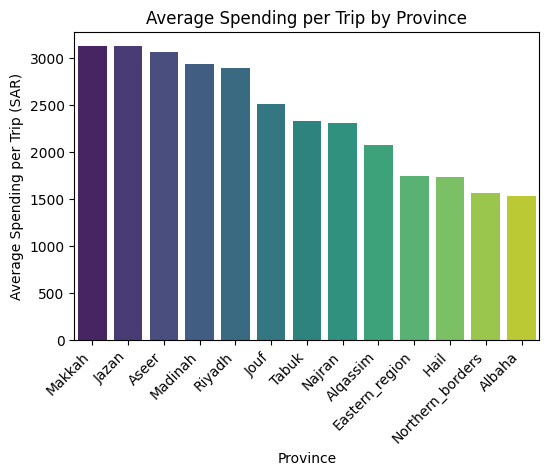

In [ ]:
# Sort provinces by average spending per trip
avg_spending_province = df.groupby("Province")["Avg_Spending_Trip"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_spending_province.index, y=avg_spending_province.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Spending per Trip (SAR)")
plt.title("Average Spending per Trip by Province")
plt.show()

Insight: Tourists tend to spend significantly more per trip in provinces such as Makkah, Jazan, and Aseer (over 3,000 SAR), while provinces like Albahah and Northern Borders see much lower average spending (around 1,500 SAR). This indicates that certain regions act as high-value tourism hubs, whereas others attract more budget-conscious or shorter visits.

/tmp/ipython-input-4161186179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tourism_Type", y="Avg_Spending_Trip", data=df, palette="pastel")


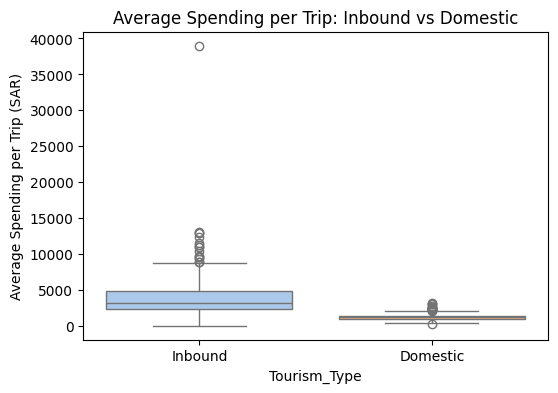

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Tourism_Type", y="Avg_Spending_Trip", data=df, palette="pastel")
plt.ylabel("Average Spending per Trip (SAR)")
plt.title("Average Spending per Trip: Inbound vs Domestic")
plt.show()


Insight: The analysis reveals a clear disparity in spending behavior: inbound tourists spend substantially more per trip compared to domestic tourists. Inbound spending also shows greater variability, with a few extreme outliers reaching up to 40,000 SAR, while domestic spending remains relatively consistent and modest.

/tmp/ipython-input-2733386969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_tourists.index, y=top5_tourists.values, palette="viridis")


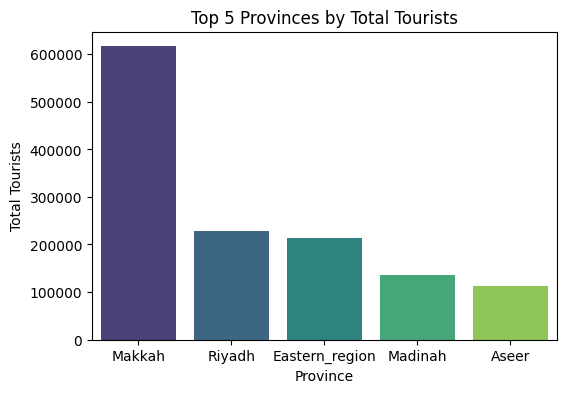

In [ ]:
top5_tourists = df.groupby("Province")["Tourists_Number"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6,4))
sns.barplot(x=top5_tourists.index, y=top5_tourists.values, palette="viridis")
plt.title("Top 5 Provinces by Total Tourists")
plt.ylabel("Total Tourists")
plt.show()


Insight: Makkah attracts the highest number of tourists by a large margin (over 600K visitors), significantly outperforming other provinces such as Riyadh and Eastern Region (~200K each). This highlights Makkah’s unique role as the primary tourism destination, likely due to religious tourism, while other provinces show moderate to lower tourist numbers, indicating a more localized or niche tourism appeal.

# Multivariate Analysis

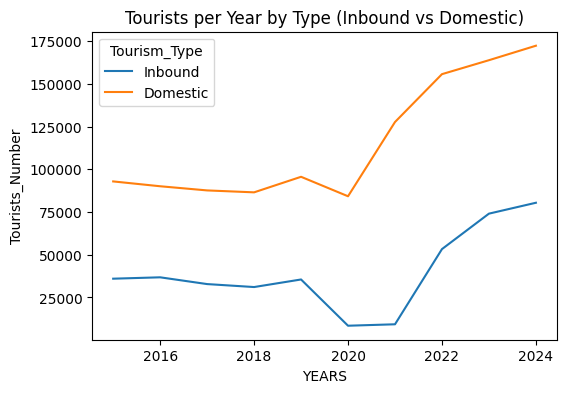

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x="YEARS", y="Tourists_Number", hue="Tourism_Type", data=df, estimator='sum', errorbar=None)
plt.title("Tourists per Year by Type (Inbound vs Domestic)")
plt.show()


Insight: The trend of tourist numbers shows a clear divergence between domestic and inbound tourism. Domestic tourism remained relatively stable until 2020, experienced a slight dip during COVID-19, and then surged significantly from 2021 onward, indicating strong local demand and successful domestic tourism initiatives. In contrast, inbound tourism dropped sharply in 2020 but gradually recovered, reflecting the reopening of borders and renewed international interest. This pattern highlights the resilience of domestic tourism and the gradual post-pandemic recovery of inbound travel.

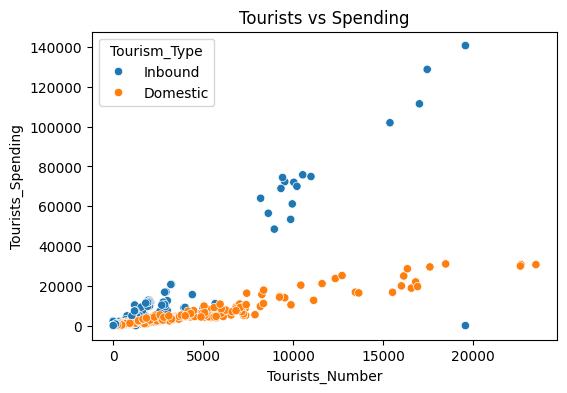

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Tourists_Number", y="Tourists_Spending", hue="Tourism_Type", data=df)
plt.title("Tourists vs Spending")
plt.show()

Insight: Inbound tourists generally spend significantly more per visit compared to domestic tourists, even when tourist numbers are similar. The scatterplot shows a clear upward trend for inbound spending, indicating that international visitors contribute a disproportionately high share of tourism revenue, making them a key target group for economic impact.

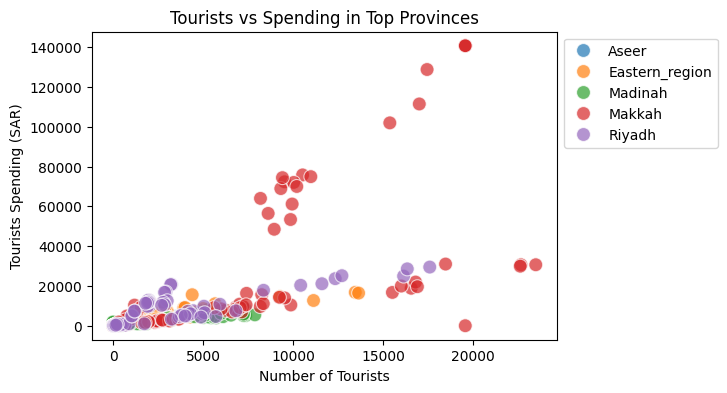

In [ ]:
top_provinces = ["Makkah", "Riyadh", "Eastern_region", "Madinah", "Aseer"]
df_top = df[df["Province"].isin(top_provinces)]

plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Tourists_Number",
    y="Tourists_Spending",
    hue="Province",
    data=df_top,
    palette="tab10",
    s=100, alpha=0.7
)
plt.xlabel("Number of Tourists")
plt.ylabel("Tourists Spending (SAR)")
plt.title("Tourists vs Spending in Top Provinces")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


Insight: The scatter plot reveals a strong positive relationship between the number of tourists and total spending, with Makkah consistently showing the highest spending levels relative to tourist numbers. This suggests that visitors to Makkah tend to spend significantly more per capita compared to other provinces. Riyadh and the Eastern Region show moderate spending despite higher tourist volumes, indicating differences in spending behavior or available tourism offerings. This insight highlights Makkah’s economic significance and suggests that targeted investment in other regions could potentially increase per-capita spending and balance tourism revenue distribution.

/tmp/ipython-input-770159401.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="YEARS", y="Tourists_Number", hue="Province", data=df_top, estimator='sum', ci=None, palette="tab10")


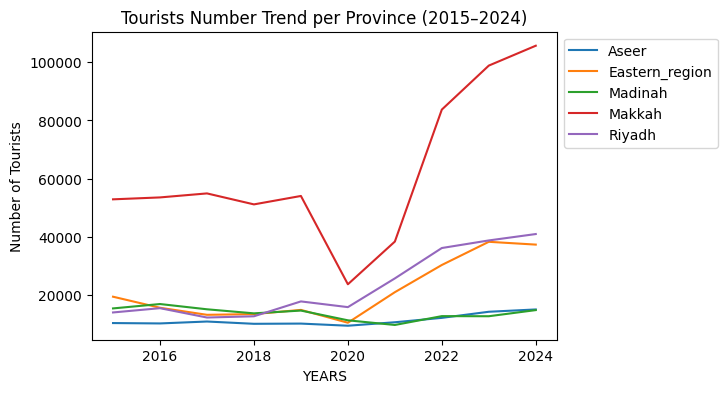

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x="YEARS", y="Tourists_Number", hue="Province", data=df_top, estimator='sum', ci=None, palette="tab10")
plt.ylabel("Number of Tourists")
plt.title("Tourists Number Trend per Province (2015–2024)")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


Insight: The line plot highlights Makkah as the leading province in tourist volume across all years, with a noticeable dip in 2020 due to COVID-19 restrictions, followed by a strong rebound surpassing pre-pandemic levels by 2022. Riyadh and the Eastern Region show steady growth after 2020, suggesting successful regional tourism initiatives. Madinah and Aseer have relatively lower tourist numbers but demonstrate a gradual upward trend, indicating potential for further development. This pattern underscores Makkah’s dominant role in attracting visitors while also revealing growth opportunities in other regions.

#  Final Conclusion

This exploratory data analysis of Saudi Arabia’s tourism sector (2015–2024) highlights several important insights:

- **General Trends**: Tourist numbers were relatively stable until 2019, dropped sharply in 2020 due to COVID-19, and then rebounded strongly from 2022 onward. By 2024, both arrivals and spending had reached record levels, surpassing pre-pandemic benchmarks.  
- **Provincial Patterns**: Makkah dominates as the primary tourism hub, driven largely by religious tourism, while Riyadh, Eastern Region, and Madinah also attract substantial flows. Smaller provinces like Jouf and Najran show niche potential with fewer visitors but higher average spending per trip.  
- **Tourism Type**: Domestic tourism drives higher volumes, while inbound tourism generates significantly more revenue per trip. This indicates a dual structure: local demand ensures stability, while international arrivals provide high-value economic impact.  
- **Spending & Behavior**: Inbound tourists consistently spend more and stay longer, with outliers reaching very high expenditure levels. Provinces such as Makkah, Jazan, and Aseer attract the highest per-trip spending, whereas Albahah and Northern Borders attract more budget-conscious visitors.  
- **Recovery & Resilience**: Domestic tourism has shown strong resilience, cushioning the impact of global shocks. Inbound tourism, although slower to recover, is now growing steadily and remains critical for maximizing economic returns.  

###  Key Takeaway
Saudi Arabia’s tourism sector is on a strong growth trajectory, supported by Vision 2030 initiatives. Makkah remains the undisputed tourism anchor, but there is clear potential to diversify tourism revenue by developing high-value offerings in other provinces. Policymakers and businesses should focus on balancing domestic resilience with international growth to ensure sustainable expansion in the coming decade.
